<a href="https://colab.research.google.com/github/alvredo5/data_mining/blob/main/ARIMA_G231220071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Mengimpor fungsi adfuller dari statsmodels
from statsmodels.tsa.stattools import adfuller

# Mengimpor pustaka pandas dengan alias pd
import pandas as pd

def test_stationarity(timeseries):

  # Determine rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  # plot rolling statistics
  plt.plot(timeseries, color='blue',label='Original')
  plt.plot(movingAverage, color='red', label='Rolling Mean')
  plt.plot(movingSTD, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  # perform Dickey-Fuller test
  print ('Results of Dickey-Fuller Test:')
  airpass_test = adfuller(timeseries['Passengers'], autolag='AIC')
  dfoutput = pd.series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in airpass_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

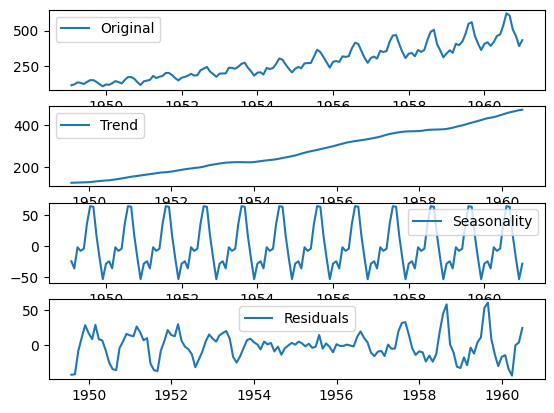

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # Import the missing function

# Contoh data: Membuat DataFrame dengan data sampel
data = {
    'Month': pd.date_range(start='1949-01', periods=144, freq='M'),
    'Passengers': [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
                   115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
                   145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
                   171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
                   196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
                   204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
                   242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
                   284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
                   315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
                   340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
                   360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
                   417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)


series = df['Passengers']
decomp=seasonal_decompose(series)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(series,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout

In [10]:
decomp_data=residual
decomp_data = decomp_data.dropna()
print(decomp_data)

Month
1949-07-31   -42.622475
1949-08-31   -42.073232
1949-09-30    -8.478535
1949-10-31    11.059343
1949-11-30    28.593434
                ...    
1960-02-29   -34.186869
1960-03-31   -43.967172
1960-04-30    -0.296717
1960-05-31     3.756313
1960-06-30    24.555556
Name: resid, Length: 132, dtype: float64


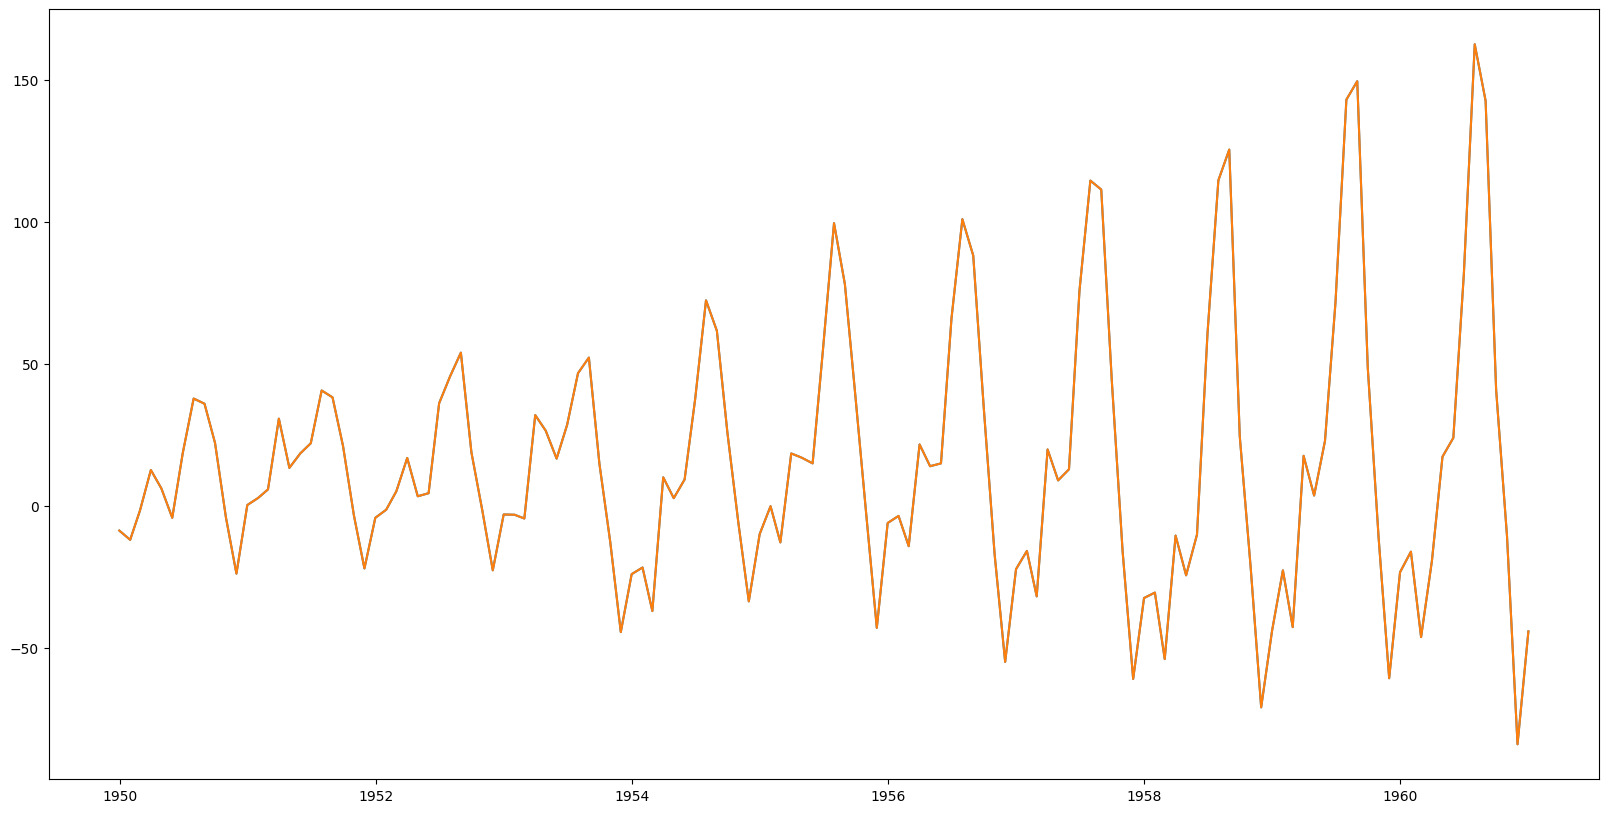

In [12]:
plt.figure(figsize=(20,10))
data_sift = series - series.rolling(window=12).mean()
plt.plot(data_sift)
data_sift.dropna(inplace=True)
plt.plot(data_sift)

MA Model Making order = (0,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


plotting ARIMA Model


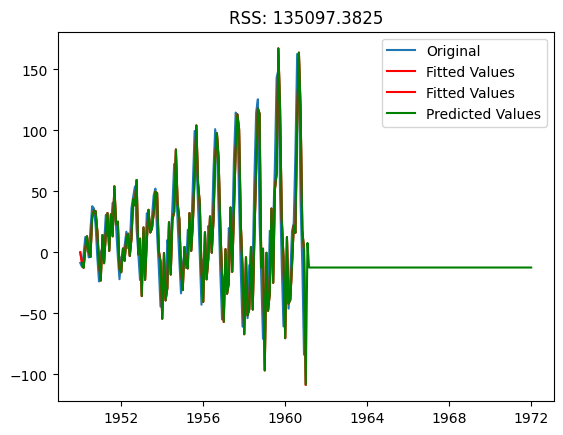

In [31]:
!pip install statsmodels pandas

# Mengimpor kelas ARIMA dari statsmodels untuk membuat model ARIMA
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(data_sift, order=(0,1,2))
results_MA = model2.fit()

# Prediksi data dari 1 hingga 264
predictions = results_MA.predict(start=1, end=264)


# Plot data asli
plt.plot(data_sift, label='Original')


# Plot hasil fitted dari model ARIMA
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values')

# Plot hasil fitted dari model ARIMA
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values')
# Plot prediksi ARIMA
plt.plot(predictions, color='green', label='Predicted Values')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - data_sift)**2))

# plt title('RSS: %.45'% sum((result.fittedvalues-data_sift['Passengers'])**2))
print('plotting ARIMA Model')
plt.legend()
plt.show()

In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-12-31     0.000000
1950-01-31    -8.669020
1950-02-28   -21.274514
1950-03-31   -18.964822
1950-04-30    -5.802292
dtype: float64

AttributeError: 'ARIMA' object has no attribute 'plot_predict'

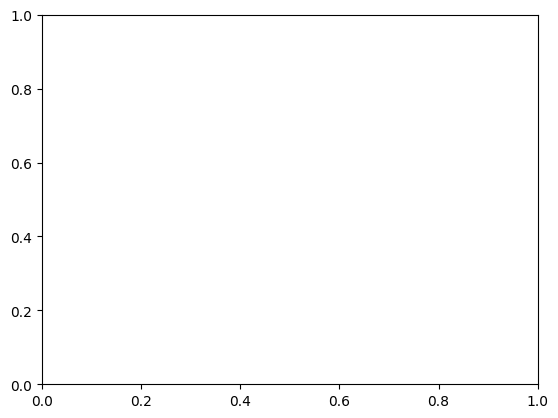

In [36]:
import matplotlib.pyplot as plt
# Assuming 'results_MA' is your fitted ARIMA model
fig, ax = plt.subplots()
# Use the 'plot_predict' method of the model itself, not the results object
results_MA.model.plot_predict(start=1, end=264, ax=ax)
plt.show()